### Example 

In [1]:
import warnings
warnings.filterwarnings('ignore') 

import pandas as pd 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target 

In [3]:
data.feature_names.shape 

(30,)

In [4]:
data.feature_names[:10]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='<U23')

In [5]:
X = df.drop(['target'], axis=1) 
y = df.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_pool, X_dsel, y_pool, y_dsel   = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

In [6]:
model1 = SVC(probability=True, random_state=42)
model2 = RandomForestClassifier(random_state=42) 
model3 = KNeighborsClassifier() 

feature_set1 = data.feature_names[:10] 
feature_set2 = data.feature_names[10:20]
feature_set3 = data.feature_names[20:]

model_pool = [model1, 
              model2, 
              model3]

feature_sets = [feature_set1, 
                feature_set2, 
                feature_set3]  

##### Train models 

In [7]:
for i in range(len(model_pool)): 
    model_pool[i].fit(X_pool[feature_sets[i]], y_pool)
    
    acc = round(model_pool[i].score(X_dsel[feature_sets[i]], y_dsel), 3) 
    print("[DSEL] Model {} acc: {}".format(i, acc)) 

[DSEL] Model 0 acc: 0.833
[DSEL] Model 1 acc: 0.808
[DSEL] Model 2 acc: 0.858


#### KNORA-U 

In [8]:
from infodeslib.des.knorau import KNORAU 

colors = {0: 'red', 1: 'green'}  

knorau = KNORAU(model_pool, feature_sets, k=7,  
                DFP=True, plot=False, X_dsel=X_dsel, y_dsel=y_dsel, colors=colors)

In [9]:
from tqdm import tqdm 

preds = [] 

for i in tqdm(range(X_test.shape[0])):
    query = X_test.iloc[[i]] 
    
    pred, conf = knorau.predict(query)
    preds.append(pred) 
    

acc = round(accuracy_score(y_test, preds), 3) 
print("[Test] acc: {}".format(acc))

100%|████████████████████████████████████████████████████████████████████████████████| 171/171 [00:05<00:00, 31.02it/s]

[Test] acc: 0.924


#### Explainmability

In [12]:
colors = {0: 'red', 1: 'green'}  

## Make plot=True 
knorau = KNORAU(model_pool, feature_sets, k=7,  
                DFP=True, plot=True, X_dsel=X_dsel, y_dsel=y_dsel, colors=colors)

Num classes: 1


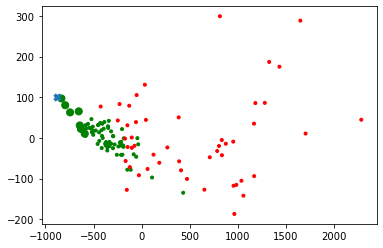

Selected models indices: [0, 1, 2] (weights: [1.0, 1.0, 1.0])
[Prediction]: 1 (Conf: 93.11 %)
[True Label]: 1


(1, 93.11)

In [13]:
index = 18
query = X_test.iloc[[index]]

knorau.predict(query, y_test.iloc[index])

Num classes: 2


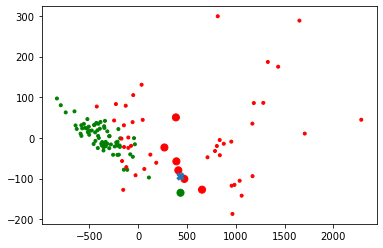

Selected models indices: [1] (weights: [1.0])
[Prediction]: 0 (Conf: 100.0 %)


(0, 100.0)

In [14]:
index = 7 
query = X_test.iloc[[index]]

knorau.predict(query, y_test.iloc[index])